# 問題

1. *seabornパッケージ*を用いて**n_charとlikeのヒストグラム散布図**を書いてください。（ただしimageごとに色を分けてください）

2. *sklearn.linear_model.PoissonRegression*はintercept_とcoef_を出力できる。これを用いて、*likeの期待値＝imageとn-charの式*　を答えてください。

3. *statsmodels*パッケージで**②と同様の計算**をしてください

4. image=1, n_char=115のツイートのいいね数の95%予測区間を作ってください

In [1]:
#ライブラリの取得
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor

import statsmodels.formula.api as smf
import statsmodels.api as sm

import math

In [2]:
#データフレームの作成
df_tweet = pd.DataFrame(
        data = {'id'     : [1,2,3,4,5,6,7,8,9,10],
                'image'  : [0,0,0,0,0,1,1,1,1,1],
                'n_char' : [100,110,120,130,140,100,110,120,130,140],
                'like'   : [0,0,2,1,3,0,3,2,4,3]}
)

#データフレーム出力
df_tweet

,id,image,n_char,like
0,1,0,100,0
1,2,0,110,0
2,3,0,120,2
3,4,0,130,1
4,5,0,140,3
5,6,1,100,0
6,7,1,110,3
7,8,1,120,2
8,9,1,130,4
9,10,1,140,3


## 上記のデータセットを考えます

# 1. seabornパッケージを用いてn-charとlikeのヒストグラム散布図を書いてください。（ただしimageごとに色を分けてください）

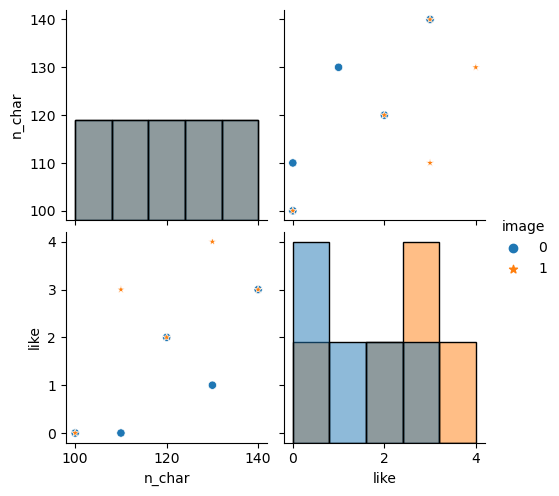

In [3]:
#散布図の作成
sns.pairplot(df_tweet[['n_char', 'like', 'image']], diag_kind='hist', hue='image',markers=['o','*'])
plt.show()

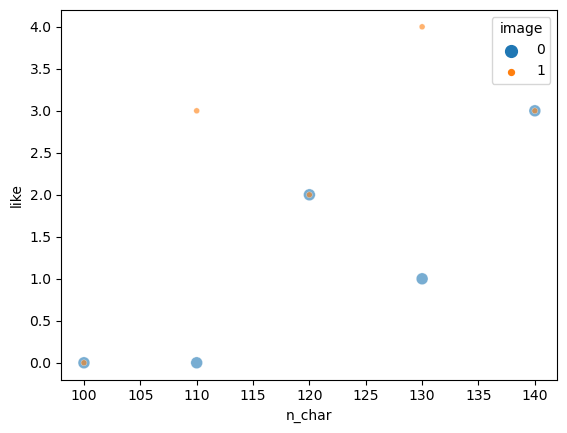

In [4]:
#散布図の作成
sns.scatterplot(x='n_char', y='like', size='image', hue='image', alpha=0.6, data = df_tweet, markers=['o','*'])

#グラフの表示
plt.show()

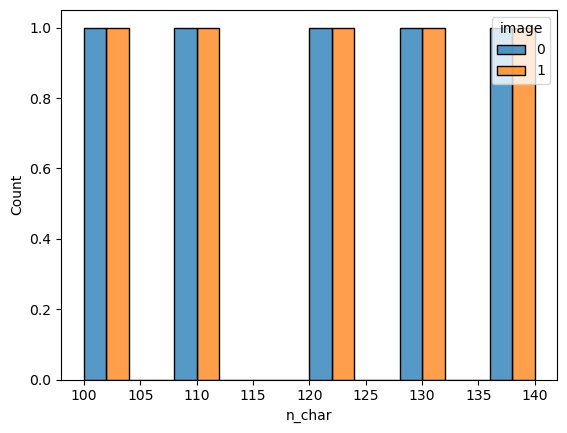

In [5]:
#ヒストグラムの作成
sns.histplot(df_tweet, x='n_char',bins=10, hue='image', multiple='dodge')
plt.show()

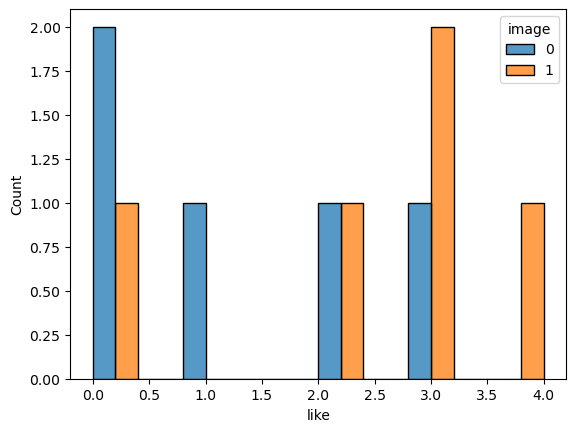

In [6]:
#ヒストグラムの作成
sns.histplot(df_tweet, x='like',bins=10, hue='image', multiple='dodge')
plt.show()

# 2. *sklearn.linear_model.PoissonRegression*はintercept_とcoef_を出力できる。これを用いて、*likeの期待値＝imageとn-charの式*　を答えてください。

In [7]:
PR = PoissonRegressor(alpha=0)

#目的変数Y=like, X=説明変数n-char, imageを定義
X = df_tweet[['n_char', 'image']].values
Y = df_tweet['like'].values

#モデルの作成
model_skl = PR.fit(X, Y)

#結果を代入
coef = PR.coef_
intercept = PR.intercept_

#結果の出力
print('切片 = ', intercept)
print('n_charの係数 = ', coef[0])
print('imageの係数 = ', coef[1])
print('---------------------------')
λ0 = math.e**intercept
λ1 = math.e**coef[0]
λ2 = math.e**coef[1]
print("λ0 = exp(",intercept,") = ",λ0)
print("λ1 = exp(",coef[0],") = ", λ1)
print("λ2 = exp(",coef[1],") = ", λ2)
print('---------------------------')

print('likeの期待値 = imageとn_charの式')
print('likeの期待値 = λ0 + λ1*n_char + λ2*image')


切片 =  -4.995325655977786
n_charの係数 =  0.04174610359579233
imageの係数 =  0.6931471219064667
---------------------------
λ0 = exp( -4.995325655977786 ) =  0.006769516206549829
λ1 = exp( 0.04174610359579233 ) =  1.0426297252040493
λ2 = exp( 0.6931471219064667 ) =  1.999999882693046
---------------------------
likeの期待値 = imageとn_charの式
likeの期待値 = λ0 + λ1*n_char + λ2*image


In [17]:
def E(n_char,image):
    return λ0  + λ1*n_char + λ2*image

E(115,1)

121.90356592425356

# 3. *statsmodels*パッケージで**②と同様の計算**をしてください

In [9]:
#モデルの作成
model_smf = smf.poisson('like ~ n_char+image', data=df_tweet).fit()
model_smf.summary()

Optimization terminated successfully.
         Current function value: 1.352168
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                   like   No. Observations:                   10
Model:                        Poisson   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Jan 2023   Pseudo R-squ.:                  0.2211
Time:                        11:03:44   Log-Likelihood:                -13.522
converged:                       True   LL-Null:                       -17.359
Covariance Type:            nonrobust   LLR p-value:                   0.02154
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9953      2.405     -2.077      0.038      -9.709      -0.282
n_char         0.0417      0.019      2.251      0.024       0.005       0.078
image          0.6931      0.500      1.386      0.166      -0.287       1.673
==============================================================================
"""

In [10]:
#結果の出力
λ0 = math.e**-4.9953
λ1 = math.e**0.0417
λ2 = math.e**0.6931
print("λ0 = exp(-4.9953) = ",λ0)
print("λ1 = exp(0.0417) = ", λ1)
print("λ2 = exp(0.6931) = ", λ2)
print('---------------------------')

print('likeの期待値 = imageとn_charの式')
print('likeの期待値 = λ0 + λ1*n_char + λ2*image')

λ0 = exp(-4.9953) =  0.00676968988733521
λ1 = exp(0.0417) =  1.042581657332697
λ2 = exp(0.6931) =  1.9999056411060796
---------------------------
likeの期待値 = imageとn_charの式
likeの期待値 = λ0 + λ1*n_char + λ2*image


# 4. image=1, n_char=115のツイートのいいね数の95%予測区間を作ってください

In [11]:
#model_skl #sklearnで作成したモデル
#model_smf #stats_modelで作成したモデル

df_pred = pd.DataFrame(
            data = {'n_char':[115],
                    "image":[1]})
pred_skl = model_skl.predict(df_pred)
pred_smf = model_smf.predict(df_pred)
print("sklearnモデルでのいいね数予測",pred_skl)
print("stats_modelモデルでのいいね数予測",pred_smf)

sklearnモデルでのいいね数予測 [1.64645317]
stats_modelモデルでのいいね数予測 0    1.646453
dtype: float64


C:\Users\kawam\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PoissonRegressor was fitted without feature names
  warnings.warn(


In [12]:
#95%信頼区間
λ = pred_skl
n  = 10
UPPER = λ + 1.96*np.sqrt(λ/n)
LOWER = λ - 1.96*np.sqrt(λ/n)
print(LOWER, "≦λ≦", UPPER)

[0.85115357] ≦λ≦ [2.44175277]


# ゴミ

In [13]:
#説明変数
x = df_tweet[['n_char', 'image']]
x = sm.add_constant(x)

#目的変数
y = df_tweet['like']

#モデルの設定(OLS:最小二乗法)
model = sm.OLS(y, x)

#回帰分析の実行
results = model.fit()

#結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     7.565
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0178
Time:                        11:03:45   Log-Likelihood:                -11.799
No. Observations:                  10   AIC:                             29.60
Df Residuals:                       7   BIC:                             30.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2000      2.560     -2.812      0.0

C:\Users\kawam\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
print('likeの期待値 = imageとn_charの式')
print('likeの期待値 = -7.20 + 0.07 * n_char + 1.20 * image')

likeの期待値 = imageとn_charの式
likeの期待値 = -7.20 + 0.07 * n_char + 1.20 * image


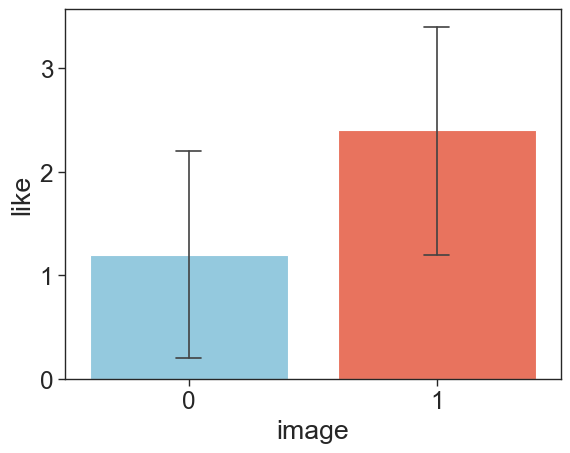

In [15]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=2)

sns.barplot(x="image", y="like", data=df_tweet, 
            palette=["skyblue", "tomato"],
           capsize=0.1, errwidth=1.2)

plt.show()